In [1]:
import pandas as pd
from dglchem.utils.data import MakeGraphDataSet, DataSet

df = pd.read_excel('/Users/faerte/Desktop/dgl_chem/data-sets/BradleyDoublePlusGoodMeltingPointDataset.xlsx')

# Making a graph dataset
data = MakeGraphDataSet(smiles = df.smiles, target = df.mpC, log=False)
#%timeit MakeGraphDataSet(smiles = df.smiles, target = df.mpC, log=False)

['bond_type_one_hot']
['bond_type_one_hot']
['bond_type_one_hot']


In [2]:
print(len(data.train))
print(len(data.test))
print(len(data.val))

NameError: name 'data' is not defined

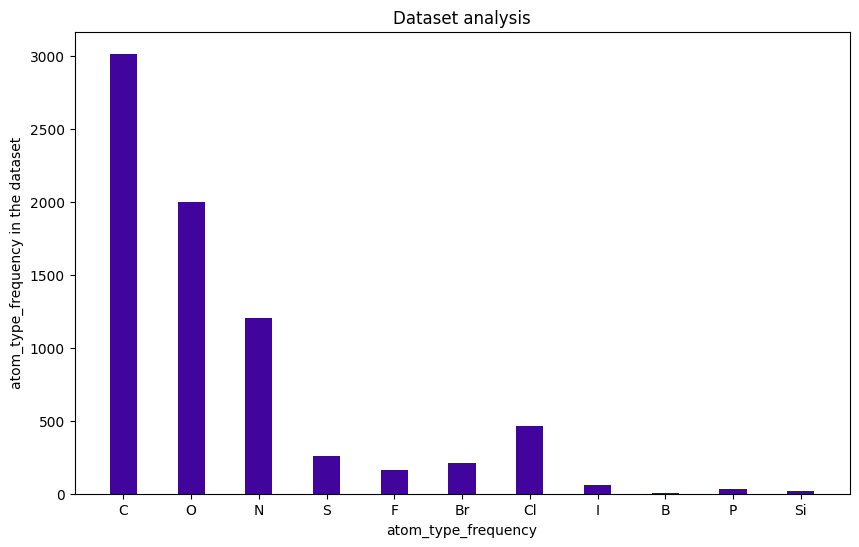

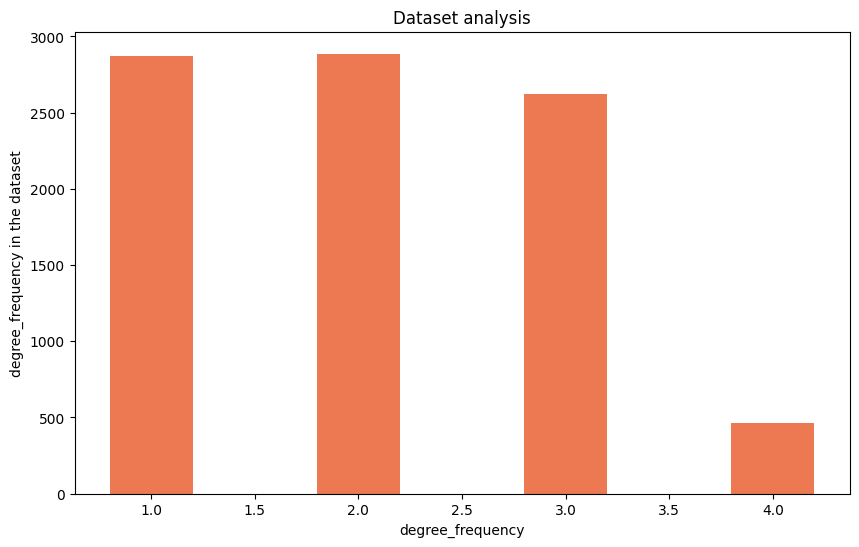

In [1]:
data.analysis()

In [ ]:
from torch_geometric.loader import DataLoader
batch_size = 32
train = DataLoader(data.train, batch_size=batch_size)
test = DataLoader(data.test, batch_size=batch_size)
val = DataLoader(data.val, batch_size=batch_size)

In [8]:
print(train)
print(test)
print(val)

Comparing my atom featurizer speed to the DGL LifeSci one:

In [1]:
from dglchem.utils.featurizer import AtomFeaturizer
from dglchem.utils.featurizer_old import AtomFeaturizerOld
from rdkit import Chem
feats = ['atom_type_one_hot','atom_degree_one_hot']
mol = Chem.MolFromSmiles('COO')
featurizer = AtomFeaturizer(atom_feature_list=feats)
featurizerold = AtomFeaturizerOld(atom_feature_list=feats)

assert((featurizer(mol)==featurizerold(mol)['h']).all())

%timeit featurizer(mol)
%timeit featurizerold(mol)

16.2 µs ± 53.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
15.9 µs ± 30.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


My implementation of the featurizer is only marginally slower than the DGL LifeSci one

In [1]:
from dglchem.utils.featurizer import BondFeaturizer
from dglchem.utils.featurizer_old import BondFeaturizerOld
from rdkit import Chem
feats = ['bond_type_one_hot','bond_is_conjugated_one_hot']
mol = Chem.MolFromSmiles('COO')
featurizer = BondFeaturizer(bond_feature_list=feats)
featurizerold = BondFeaturizerOld(bond_feature_list=feats)

assert((featurizer(mol)==featurizerold(mol)['e']).all())

%timeit featurizer(mol)
%timeit featurizerold(mol)

12.8 µs ± 22.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
12.1 µs ± 19.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
